# Analysis of a SRS protocol in a tree network

 - We analyze the Single Random Swap (SRS) protocol.
 - The network topology is a ($d$,$k$)-tree.

In [1]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdmn
import importlib as imp
import os
import random

import main_cd as main
import main_cd_plots as pltm
import validation_tests as tests

# Dark background?
dark = False
if dark==True:
    plt.style.use('dark_background')
else:
    plt.style.use('default')
    
# Latex
from matplotlib import rc

# Save figures in the notebook with decent quality
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

# Create figures directory if needed
try:
    os.mkdir('figs')
except FileExistsError:
    pass

---

# Baseline

---

In [4]:
imp.reload(main)

# Topology
protocol = 'srs'
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

# Hardware
p_gen = 0.9
p_swap = 1
q_swap = 0
qbits_per_channel = 5
coherence_time = 2000

# Software/application
max_links_swapped = 4
p_cons = 0.225
F_app = 0.6

# Cutoff calculation
F_new = 1-p_gen/8
cutoff = np.floor( -coherence_time * np.log(3*(
            (4*F_app-1)/3)**(1/max_links_swapped)/(4*F_new-1)) )
print('cutoff =',cutoff)


# Simulation
data_type = 'avg'
N_samples = 1000000
total_time = 10*cutoff
window = 2*cutoff
tolerance = 1e-2
randomseed = 2
np.random.seed(randomseed)


# Plot vs q
users = [0,1,2]
varying_array = np.arange(0,1.01,0.05)
varying_param = 'q_swap'

cutoff = 56.0


q_swap:   0%|          | 0/21 [00:00<?, ?it/s]

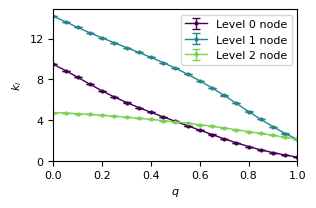

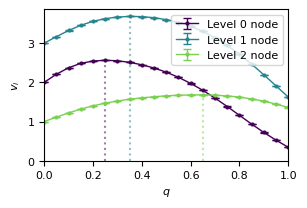

In [5]:
imp.reload(main)

main.plot_avgs_vs_param(users, varying_array, varying_param,
                protocol, data_type, topology, n, p_gen, q_swap, p_swap,
                p_cons, cutoff, max_links_swapped, qbits_per_channel,
                N_samples, total_time, randomseed,
                dark=False, legend='levels', x_cm=8, y_cm=5, save=True,
                steady_state_window=2, physical_degrees=main.physical_degrees(A))

---

# Larger trees

---

In [6]:
imp.reload(main)

# Topology
d = 3
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

# Simulation
data_type = 'avg'
N_samples = 1000

# Plot vs q
users = [0,1,2]

q_swap:   0%|          | 0/21 [00:00<?, ?it/s]

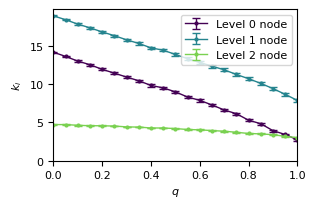

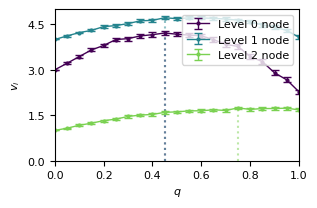

In [7]:
imp.reload(main)

main.plot_avgs_vs_param(users, varying_array, varying_param,
                protocol, data_type, topology, n, p_gen, q_swap, p_swap,
                p_cons, cutoff, max_links_swapped, qbits_per_channel,
                N_samples, total_time, randomseed,
                dark=False, legend='levels', x_cm=8, y_cm=5, save=True,
                steady_state_window=None, physical_degrees=main.physical_degrees(A))

In [8]:
imp.reload(main)

# Topology
d = 2
k = 4
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

# Simulation
data_type = 'avg'
N_samples = 1000

# Plot vs q
users = [0,1,2,3]

q_swap:   0%|          | 0/21 [00:00<?, ?it/s]

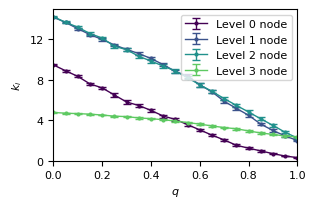

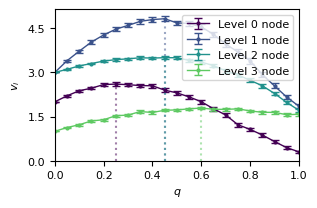

In [9]:
imp.reload(main)

main.plot_avgs_vs_param(users, varying_array, varying_param,
                protocol, data_type, topology, n, p_gen, q_swap, p_swap,
                p_cons, cutoff, max_links_swapped, qbits_per_channel,
                N_samples, total_time, randomseed,
                dark=False, legend='levels', x_cm=8, y_cm=5, save=True,
                steady_state_window=None, physical_degrees=main.physical_degrees(A))

---

# Less consumption

---

In [10]:
imp.reload(main)

# Topology
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

# Simulation
data_type = 'avg'
N_samples = 1000

# Software/application
p_cons = 0.1

# Plot vs q
users = [0,1,2]

q_swap:   0%|          | 0/21 [00:00<?, ?it/s]

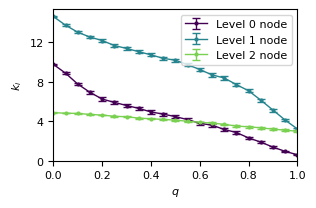

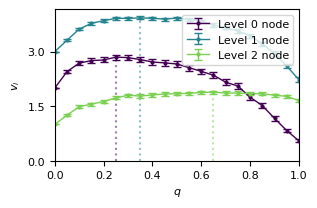

In [11]:
imp.reload(main)

main.plot_avgs_vs_param(users, varying_array, varying_param,
                protocol, data_type, topology, n, p_gen, q_swap, p_swap,
                p_cons, cutoff, max_links_swapped, qbits_per_channel,
                N_samples, total_time, randomseed,
                dark=False, legend='levels', x_cm=8, y_cm=5, save=True,
                steady_state_window=None, physical_degrees=main.physical_degrees(A))

---

# Probabilistic swaps

---

In [12]:
imp.reload(main)

# Software/application
p_cons = 0.1
p_swap = 0.5

# Plot vs q
users = [0,1,2]

q_swap:   0%|          | 0/21 [00:00<?, ?it/s]

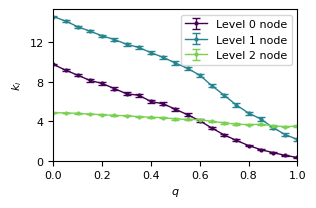

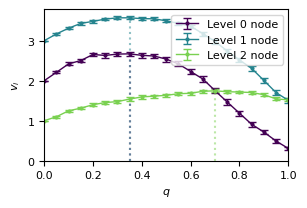

In [13]:
imp.reload(main)

main.plot_avgs_vs_param(users, varying_array, varying_param,
                protocol, data_type, topology, n, p_gen, q_swap, p_swap,
                p_cons, cutoff, max_links_swapped, qbits_per_channel,
                N_samples, total_time, randomseed,
                dark=False, legend='levels', x_cm=8, y_cm=5, save=True,
                steady_state_window=None, physical_degrees=main.physical_degrees(A))